Problem set 6: Generalized linear models
=======================
----------------------------


By Zhuo Leng
------------------

part1 : Modeling voter turnout
----------------

problem1 : Describe the data (1 point)
----------------

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘broom’

The following object is masked from ‘package:modelr’:

    bootstrap

Loading tidyverse: tibble
Loading tidyverse: readr
Loading tidyverse: purrr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


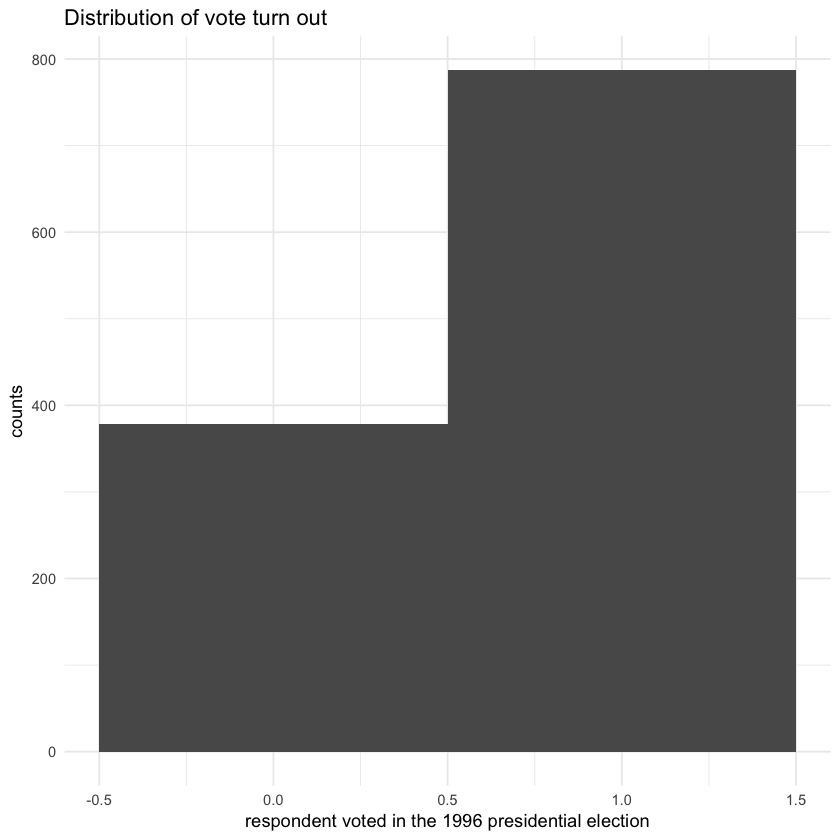

In [3]:
###problem 1 
library(ggplot2)
install.packages("dplyr")
library(dplyr)
library(tidyr)
library(modelr)
library(broom)

library(tidyverse)
library(forcats)

options(na.action = na.warn)
set.seed(1234)

theme_set(theme_minimal())


health_data <- read.csv(file = 'mental_health.csv', header = T)
attach(health_data)

health_data <- health_data %>%
  as_tibble() %>%
  # remove missing values
  filter(vote96!='NA')  %>%
  na.omit()

ggplot(data = health_data, aes(x= vote96)) +
  geom_histogram(binwidth = 1) + 
  labs(title = "Distribution of vote turn out",x = "respondent voted in the 1996 presidential election",y = "counts")

1.Plot a histogram of voter turnout. Make sure to give the graph a title and proper x and y-axis labels. What is the unconditional probability of a given individual turning out to vote?



In [27]:
pr = nrow(filter(health_data, vote96 == 1))/nrow(health_data)

[1] 0.6755365

The unconditional probability of a given individual turning out to vote is 67.56%

Warning message:
“Removed 1510 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1510 rows containing missing values (geom_point).”

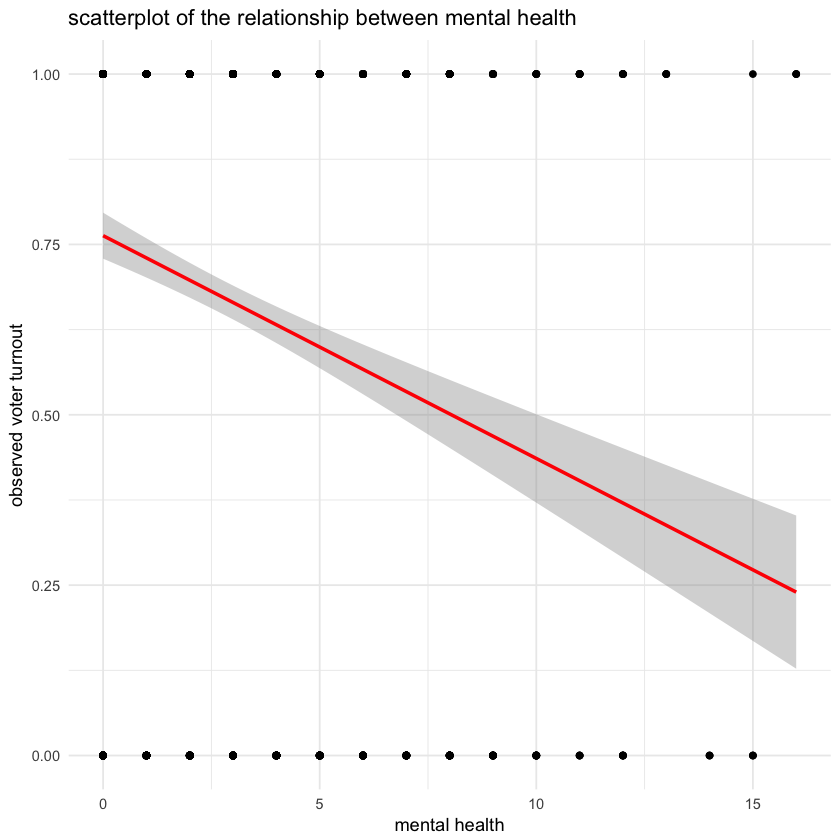

In [31]:
####1(2)
ggplot(health_data, aes(mhealth_sum, vote96)) +
  geom_point() +
  geom_smooth(method = "lm", color = 'red',size = 1) +
  labs(title = "scatterplot of the relationship between mental health",
        x = "mental health",
        y = "observed voter turnout")

2.Generate a scatterplot of the relationship between mental health and observed voter turnout and overlay a linear smoothing line. What information does this tell us? What is problematic about this linear smoothing line?

This graph tells us that the relationship between voter turnout and mental health is negatively. With the increase of mental health, the probability of vote can be decrease. Also, this plot show that the voter turn out only has two value: 0 and 1. However, this smooth line model could gives us predicted values such as .5 or 0.75. Moreover, the plot can get negetive vote probability when it strench further.

problem2: Basic model (3 points)
----------
Estimate a logistic regression model of the relationship between mental health and voter turnout.


In [4]:
lm.fit1 <- glm(vote96 ~ mhealth_sum, data = health_data, family = binomial)
summary(lm.fit1)


The following objects are masked from health_data (pos = 3):

    age, black, educ, female, inc10, married, mhealth_sum, vote96

Warning message:
“Dropping 1510 rows with missing values”


Call:
glm(formula = vote96 ~ mhealth_sum, family = binomial, data = health_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6834  -1.2977   0.7452   0.8428   1.6911  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.13921    0.08444  13.491  < 2e-16 ***
mhealth_sum -0.14348    0.01969  -7.289 3.13e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1672.1  on 1321  degrees of freedom
Residual deviance: 1616.7  on 1320  degrees of freedom
  (1510 observations deleted due to missingness)
AIC: 1620.7

Number of Fisher Scoring iterations: 4


1.Is the relationship between mental health and voter turnout statistically and/or substantively significant?

From the summary table above, we could see the mhealth_sum has p-value = 3.13e-13 , which indicates significant statistic relationship.

2.From the table, we could know that the estimated parameter of voter turnout is -0.14348, which imply that when one unit increase in mhealth_sum predictor, the voter turnout would be on average decrease by 0.14348.

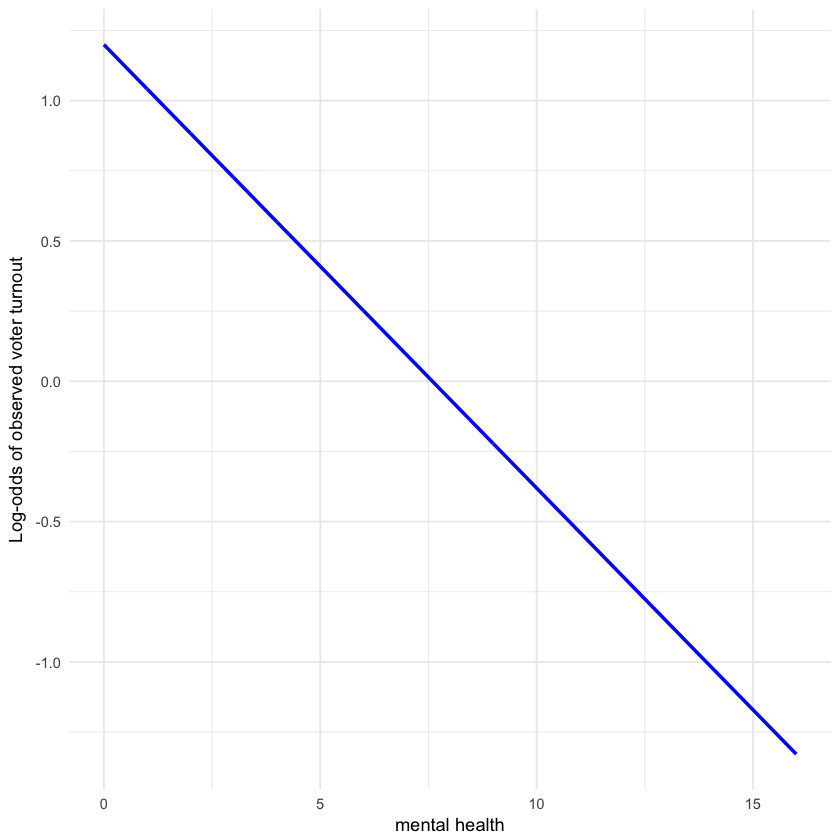

In [7]:
##log-odds
vote_health_pred <- health_data %>%
  add_predictions(lm.fit1)

ggplot(vote_health_pred, aes(mhealth_sum, pred)) +
  geom_line(color = "blue", size = 1) +
  labs(x = "mental health",
       y = "Log-odds of observed voter turnout")


3.Interpret the estimated parameter for mental health in terms of odds.

From the table, we could know that the estimated parameter of voter turnout is -0.14348, which imply that when one unit increase in mhealth_sum predictor, the odds of voter turnout would be on average decrease by 1.1543.


Warning message:
“Removed 1418 rows containing missing values (geom_path).”

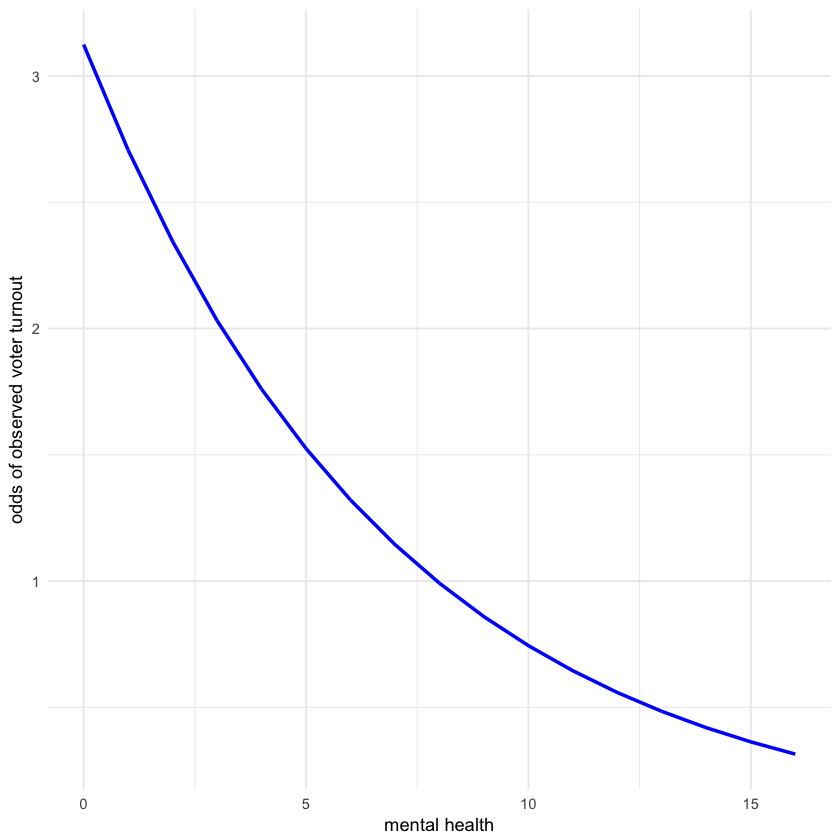

In [50]:
#3.Interpret the estimated parameter for mental health in terms of odds

#logistic function
logit2prob <- function(x){
  exp(x) / (1 + exp(x))
}

# generate predicted values
vote_health_pred <- health_data %>%
  add_predictions(lm.fit1) %>%
  # predicted values are in the log-odds form - convert to probabilities
  mutate(prob = logit2prob(pred))

prob2odds <- function(x){
  x / (1 - x)
}

vote_health_pred <- vote_health_pred %>%
  mutate(odds = prob2odds(prob))

ggplot(vote_health_pred, aes(mhealth_sum, odds)) +
  geom_line(color = "blue", size = 1) +
  labs(x = "mental health",
       y = "odds of observed voter turnout")

4.Interpret the estimated parameter for mental health in terms of probability

Warning message in eval(expr, envir, enclos):
“non-integer #successes in a binomial glm!”

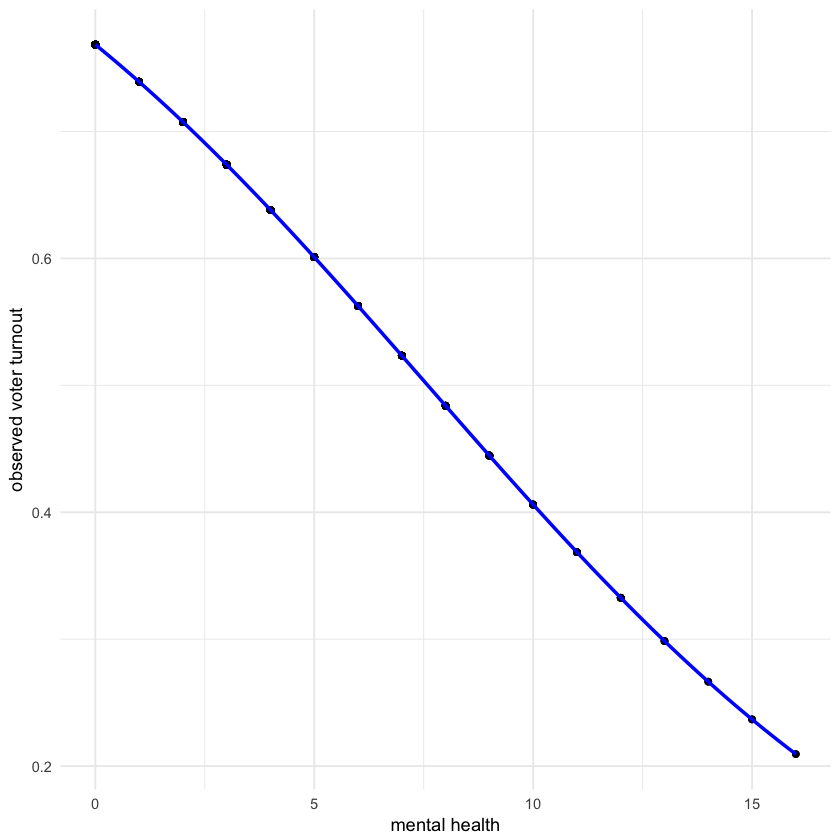

In [18]:

ggplot(vote_health_pred, aes(mhealth_sum, prob)) +
  geom_point() +
  # use geom_smooth for out-of-sample range plotting
  geom_smooth(method = "glm", method.args = list(family = "binomial"),
              se = FALSE, fullrange = TRUE, color = "blue", size = 1) +
  labs(x = "mental health",
       y = "observed voter turnout")



In [18]:
#4
grid <- data.frame(mhealth_sum = c(1, 2, 5, 6))%>%
  add_predictions(lm.fit1)%>%
  mutate(prob = logit2prob(pred))

grid[2,]$prob - grid[1,]$prob
grid[4,]$prob - grid[3,]$prob

[1] -0.02917824

[1] -0.03477821

What is the first difference for an increase in the mental health index from 1 to 2? What about for 5 to 6?
The first difference for an increase in the mental health index from 1 to 2 is -0.0291782383716035,
for 5 to 6 is -0.0347782137951933

5.Estimate the accuracy rate, proportional reduction in error (PRE), and the AUC for this model. Do you consider it to be a good model?

In [24]:
##accuracy rate
health_accuracy <- health_data %>%
  add_predictions(lm.fit1) %>%
  mutate(pred = logit2prob(pred),
         pred = as.numeric(pred > .5))

mean(health_accuracy$vote96 == health_accuracy$pred, na.rm = TRUE)

#Proportional reduction in error

# function to calculate PRE for a logistic regression model
PRE <- function(model){
  # get the actual values for y from the data
  y <- model$y
  
  # get the predicted values for y from the model
  y.hat <- round(model$fitted.values)
  
  # calculate the errors for the null model and your model
  E1 <- sum(y != median(y))
  E2 <- sum(y != y.hat)
  
  # calculate the proportional reduction in error
  PRE <- (E1 - E2) / E1
  return(PRE)
}

PRE = PRE(lm.fit1)
PRE

[1] 0.677761

[1] 0.01616628

In [32]:
###AUC for the model#########################undone
install.packages('pROC')
library(pROC)

auc_x <- auc(health_accuracy$vote96, health_accuracy$pred)
auc_x

Area under the curve: 0.6081

5.

The accuracy rate is 67.78% 
Proportional reduction in error is 1.62%
The AUC is 0.60805. 

I don' think the model fit well. Although the accuracy rate is depends, we could still refer to porpotionaly error reduction. It only around 1.6%, which is really low in range of (0:100). It means this model reduced less of the prediction error. So it not a good model.

Problem 3: Multiple variable model (3 points)
---------------------

1.Write out the three components of the GLM for your specific model of interest.

Element of GLM:
________________
Probability distribution (random component):
The random component is the Bernoulli distribution in my model
$$Pr({Y_i} = {y_i}|\pi ) = {\pi_{i}}^{y_i}{(1 - {\pi_i})}^{(1-{y_i})}$$

---------------
Linear predictor:
In my model, the linear predictors are health, age, education and family income. The model is: 
$$vote96_{i} = \beta_{0} + \beta_{1}mhealth\_sum + \beta_{2}age + \beta_{3}educ + \beta_{4}inc10$$ 

---------------

Link function:
$${\pi_i} = \frac{e^{\eta_i}}{1 + e^{\eta_i}}$$ 

2.Estimate the model and report your results

In [35]:
lm.fit2 <- glm(vote96 ~ mhealth_sum + age + educ + inc10, data = health_data, family = binomial)
summary(lm.fit2)



Call:
glm(formula = vote96 ~ mhealth_sum + age + educ + inc10, family = binomial, 
    data = health_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5650  -1.0385   0.5264   0.8428   2.1159  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.053955   0.490844  -8.259  < 2e-16 ***
mhealth_sum -0.091129   0.023555  -3.869 0.000109 ***
age          0.042576   0.004793   8.883  < 2e-16 ***
educ         0.217151   0.028987   7.491 6.82e-14 ***
inc10        0.085883   0.024440   3.514 0.000441 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1468.3  on 1164  degrees of freedom
Residual deviance: 1247.3  on 1160  degrees of freedom
AIC: 1257.3

Number of Fisher Scoring iterations: 4


In [37]:
##accuracy rate
health_accuracy2 <- health_data %>%
  add_predictions(lm.fit2) %>%
  mutate(pred = logit2prob(pred),
         pred = as.numeric(pred > .5))

mean(health_accuracy2$vote96 == health_accuracy2$pred, na.rm = TRUE)

#Proportional reduction in error

# function to calculate PRE for a logistic regression model
PRE <- function(model){
  # get the actual values for y from the data
  y <- model$y
  
  # get the predicted values for y from the model
  y.hat <- round(model$fitted.values)
  
  # calculate the errors for the null model and your model
  E1 <- sum(y != median(y))
  E2 <- sum(y != y.hat)
  
  # calculate the proportional reduction in error
  PRE <- (E1 - E2) / E1
  return(PRE)
}

PRE = PRE(lm.fit2)
PRE

auc_x2 <- auc(health_accuracy2$vote96, health_accuracy2$prob)
auc_x2

[1] 0.7167382

[1] 0.1269841

Area under the curve: 0.6315

From the statistics table above, we could know that the all predictors in the model are statistics significant. All of them have p-value < 0.05, which means they are significant at 95% level. What's more, we could also take a look at the coefficients of our predictors. The coefficients of mhealth_sum is -0.091129, which means one unit increase in mhealth_sum, there will be 0.091129 unit decrease in log-odds of vote69 on average. The coefficients of age, educ, inc10 are positive, and they are 0.042576, 0.217, 0.085 increase repectively. There will be 0.042576, 0.217, 0.085 increase in log-odds of vote69 repectively when one unit increase in age, edu or inc10.

The model have been improve, although it still not fit the data well. The accuracy rate of model2 is 71.6739%, compared to The accuracy rate: 67.78% of the first model, this model is more accurate. At the same time, take a look at Proportional reduction in error. It increase from 1.62% to 12.7%. However, it still really low in range of (0:100). The AUC is 0.631547366934915, it doesn't seems change a lot. So, in conclusion, although this new model makes an impovement of the first one which only one predictor. This model is still not a good model.

Part 2: Modeling tv consumption
----------------

1.Write out the three components of the GLM for your specific model of interest.

Element of GLM:
________________
Probability distribution (random component):
The random component is the the Poisson distribution in my model
$$Pr({tvhours_i} = {y_i}|\mu) = \frac{\mu^{y_i} e^{-\mu}} {y_i!}$$ 

---------------
Linear predictor:
In my model, the linear predictors are black educ and hrsrelax. The model is: 
$$tvhours_{i} = \beta_{0} + \beta_{1}educ + \beta_{2}hrsrelax + \beta_{3}black $$ 

---------------
Link function:
$$\mu_{i} = ln({tvhours_i})$$ 




2.Estimate the model and report your results.

In [10]:
tv_data <- read.csv(file = 'gss2006.csv', header = T)
attach(tv_data)

tv_data <- tv_data %>%
  # remove missing values
  filter(tvhours != "") %>%
  na.omit()

lm.fit3 <- glm(tvhours ~ ., data = tv_data, family = poisson())
summary(lm.fit3)



The following objects are masked from health_data:

    age, black, educ, female




Call:
glm(formula = tvhours ~ ., family = poisson(), data = tv_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.1120  -0.6741  -0.1144   0.4224   4.9257  

Coefficients: (1 not defined because of singularities)
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)        1.0795865  0.2419794   4.461 8.14e-06 ***
age                0.0016522  0.0028397   0.582   0.5607    
childs            -0.0003896  0.0238729  -0.016   0.9870    
educ              -0.0292174  0.0126351  -2.312   0.0208 *  
female             0.0457000  0.0652987   0.700   0.4840    
grass             -0.1002726  0.0686146  -1.461   0.1439    
hrsrelax           0.0468472  0.0102790   4.558 5.18e-06 ***
black              0.4657924  0.0841629   5.534 3.12e-08 ***
social_connect     0.0437349  0.0407999   1.072   0.2837    
voted04           -0.0994787  0.0785680  -1.266   0.2055    
xmovie             0.0708408  0.0773420   0.916   0.3597    
zodiacAries       -0.1011364

At first I use all predictions, the regression result shows that only coefficients of parameters are significant. So then I use that three predictors(educ, hrsrelax and black) to form a new model.

In [11]:
lm.fit4 <- glm(tvhours ~ educ + hrsrelax + black, data = tv_data, family = poisson())
summary(lm.fit4)


Call:
glm(formula = tvhours ~ educ + hrsrelax + black, family = poisson(), 
    data = tv_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9678  -0.7200  -0.1363   0.4511   5.5468  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.154578   0.165344   6.983 2.89e-12 ***
educ        -0.038361   0.011103  -3.455  0.00055 ***
hrsrelax     0.046868   0.009447   4.961 7.00e-07 ***
black        0.440052   0.072114   6.102 1.05e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 527.72  on 440  degrees of freedom
Residual deviance: 445.51  on 437  degrees of freedom
AIC: 1574.5

Number of Fisher Scoring iterations: 5


From the statistics table above, all predictors seems statistics significant. From the positive coefficients of black and hrsrelax predictors, we could know that with one unit increase in hrsrelax or the race of people are black, the log-odds of tvhours will on average increase 0.440052 and 0.046868 respectively. On the other hand, educ predictor has nagetive coefficient. When educ increase one unit, the log-odds of tvhours will decrease by 0.038361 on average.

3.Interpret the results in paragraph format. 

In [15]:
##accuracy rate
tv_accuracy <- tv_data %>%
  add_predictions(lm.fit4) %>%
  mutate(pred = logit2prob(pred),
         pred = as.numeric(pred > .5))

mean(tv_accuracy$tvhours == tv_accuracy$pred, na.rm = TRUE)

#Proportional reduction in error

# function to calculate PRE for a logistic regression model
PRE <- function(model){
  # get the actual values for y from the data
  y <- model$y
  
  # get the predicted values for y from the model
  y.hat <- round(model$fitted.values)
  
  # calculate the errors for the null model and your model
  E1 <- sum(y != median(y))
  E2 <- sum(y != y.hat)
  
  # calculate the proportional reduction in error
  PRE <- (E1 - E2) / E1
  return(PRE)
}

PRE = PRE(lm.fit4)
PRE


[1] 0.2267574

[1] -0.04095563

From the statistics table above, we could know that the model we use is not fit very well. From the p-value of age and childs predictors, we could see neither of them are significant. Educ(education) and hrsrelax(hours per day to relax) have a p-value < 0.05, which means they are significant predictors of tvhours. What's more, we could also interpret the coefficients of our predictors. The coefficients of childs and hrsrelax are 0.013424 and 0.057044 respectively. They are both positive, which means an increase of one unit in childs or hrsrelax whill could an average increase in tvhours 0.013424 and 0.057044 respectively.By check the accuracy rate, it's 0.226757369614512, the porpotional reduction of error is -0.0409556313993174. This is not a good model. the accuracy rate is only 22.7%.